<img src="https://png.icons8.com/office/80/000000/museum.png" style="float: left; margin: 15px; height: 80px">

# Capstone Project

### Home Credit Default Risk

Strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience.

[Home Credit Default Risk data on kaggle](https://www.kaggle.com/c/home-credit-default-risk).


#  Structure
- [Preprocess Data](#preprocess_data)
    - [Data Munging](#data_munging)
    - [Exploratory Data Analysis (EDA)](#eda)
    - [Feature Engineering](#feature_engineering)
- [Prepare train and test set](#prep_train_test)
- [Model and Test](#model_test)

In [1]:
# define constants

# configuration
DATA_DIRECTORY = 'C:/Users/mail/GA_DSI/data for projects/Home Credit Default Risk'


In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='preprocess_data'></a>
# Preprocess data

<a id='data_munging'></a>
## Data Munging

In [3]:
# functions used by Data Munging

# Get the outliers
def get_outliers(df,col_name):
    percentile_25,percentile_75 = np.percentile(df[col_name], [25, 75])
    iqr = percentile_75 - percentile_25
    lower_limit = percentile_25 - iqr
    upper_limit = percentile_75 + iqr

    print('Getting outliers outside...')    
    print('25th percentile - IQR: {%d}:' % lower_limit)
    print('75th percentile + IQR: {%d}: ' % upper_limit)

    df_train_outliers = df[(df[col_name] < lower_limit) | (df[col_name] > upper_limit)]
    return df_train_outliers

In [4]:
# read in data - application
app_train = pd.read_csv(DATA_DIRECTORY + '/application_train.csv')

In [5]:
app_train_object_column_names = app_train.select_dtypes(object).columns.tolist()
app_train_numerical_column_names = app_train.select_dtypes(include='number').columns.tolist()
assert len(app_train_object_column_names) + len(app_train_numerical_column_names) == len(app_train.columns)

In [31]:
app_train_numerical_column_names

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [32]:
app_train.dtypes[0:50]

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE         

In [33]:
app_train.dtypes[51:100]

FLOORSMAX_AVG                   float64
FLOORSMIN_AVG                   float64
LANDAREA_AVG                    float64
LIVINGAPARTMENTS_AVG            float64
LIVINGAREA_AVG                  float64
NONLIVINGAPARTMENTS_AVG         float64
NONLIVINGAREA_AVG               float64
APARTMENTS_MODE                 float64
BASEMENTAREA_MODE               float64
YEARS_BEGINEXPLUATATION_MODE    float64
YEARS_BUILD_MODE                float64
COMMONAREA_MODE                 float64
ELEVATORS_MODE                  float64
ENTRANCES_MODE                  float64
FLOORSMAX_MODE                  float64
FLOORSMIN_MODE                  float64
LANDAREA_MODE                   float64
LIVINGAPARTMENTS_MODE           float64
LIVINGAREA_MODE                 float64
NONLIVINGAPARTMENTS_MODE        float64
NONLIVINGAREA_MODE              float64
APARTMENTS_MEDI                 float64
BASEMENTAREA_MEDI               float64
YEARS_BEGINEXPLUATATION_MEDI    float64
YEARS_BUILD_MEDI                float64


In [34]:
app_train.dtypes[101:]

FLAG_DOCUMENT_7                 int64
FLAG_DOCUMENT_8                 int64
FLAG_DOCUMENT_9                 int64
FLAG_DOCUMENT_10                int64
FLAG_DOCUMENT_11                int64
FLAG_DOCUMENT_12                int64
FLAG_DOCUMENT_13                int64
FLAG_DOCUMENT_14                int64
FLAG_DOCUMENT_15                int64
FLAG_DOCUMENT_16                int64
FLAG_DOCUMENT_17                int64
FLAG_DOCUMENT_18                int64
FLAG_DOCUMENT_19                int64
FLAG_DOCUMENT_20                int64
FLAG_DOCUMENT_21                int64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

In [35]:
# check target baseline
1-app_train['TARGET'].mean()

0.9192711805431351

In [36]:
app_train['TARGET'].agg(['mean', 'sum'])

mean        0.080729
sum     24825.000000
Name: TARGET, dtype: float64

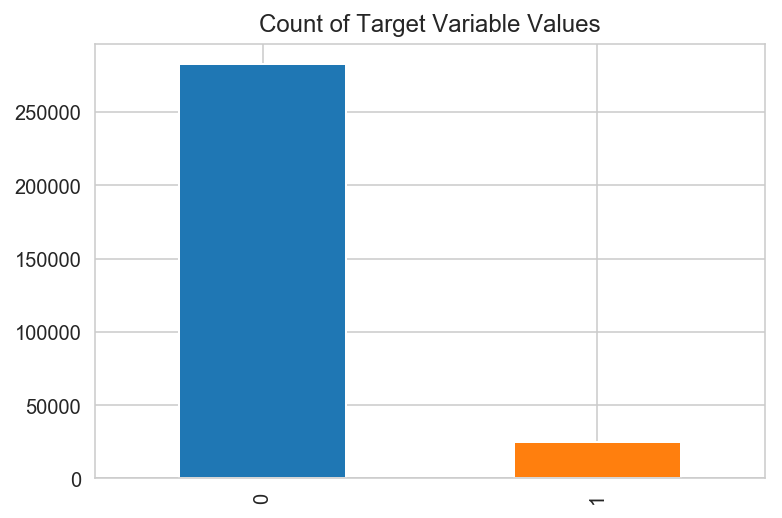

In [37]:
app_train['TARGET'].value_counts().plot(kind='bar',title='Count of Target Variable Values')

High level of imbalance. Most clients do not have payment difficulties.

#### Check and handle missing values

In [6]:
def find_nulls(df,to_sort=False):
    df_nulls_sum = df.isnull().sum()
    col_null_selector = df_nulls_sum > 0
    number_of_rows = df.shape[0]
    df_nulls_percentage = round(df_nulls_sum[col_null_selector] * 100 / number_of_rows,2)
    if (to_sort):
        return pd.DataFrame(data={'number_of_nulls': df_nulls_sum[col_null_selector],\
                '%_nulls': df_nulls_percentage,
               'data_type':df.dtypes[col_null_selector]}).sort_values(by='number_of_nulls', ascending=False)
    else:
        return pd.DataFrame(data={'number_of_nulls': df_nulls_sum[col_null_selector],\
                '%_nulls': df_nulls_percentage,
               'data_type':df.dtypes[col_null_selector]})           
    
df_nulls = find_nulls(app_train,to_sort=False)

In [39]:
df_nulls[1:50]

,number_of_nulls,%_nulls,data_type
AMT_GOODS_PRICE,278,0.09,float64
NAME_TYPE_SUITE,1292,0.42,object
OWN_CAR_AGE,202929,65.99,float64
OCCUPATION_TYPE,96391,31.35,object
CNT_FAM_MEMBERS,2,0.00,float64
EXT_SOURCE_1,173378,56.38,float64
EXT_SOURCE_2,660,0.21,float64
EXT_SOURCE_3,60965,19.83,float64
APARTMENTS_AVG,156061,50.75,float64
BASEMENTAREA_AVG,179943,58.52,float64


In [40]:
df_nulls[51:100]

,number_of_nulls,%_nulls,data_type
FONDKAPREMONT_MODE,210295,68.39,object
HOUSETYPE_MODE,154297,50.18,object
TOTALAREA_MODE,148431,48.27,float64
WALLSMATERIAL_MODE,156341,50.84,object
EMERGENCYSTATE_MODE,145755,47.40,object
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33,float64
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33,float64
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33,float64
DAYS_LAST_PHONE_CHANGE,1,0.00,float64


In [41]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='eda'></a>
## Exploratory Data Analysis (EDA)

### Univariate analysis

In [7]:
def analyse_object_basic(df, object_name, target_name):
    print('='*50)
    print('Analyzing {}:'.format(object_name))
    print('-'*50)
    print(df[object_name].value_counts())
    print('-'*50)
    #print(df[[object_name,target_name,'SK_ID_CURR']].groupby([object_name,target_name]).count())
    counts = df[[object_name,target_name]].groupby([object_name,target_name]).size()
    counts = counts.reset_index()
    counts.columns = [object_name,target_name,'count'] #rename the third column   
    counts['percent'] = counts.groupby(object_name)['count']\
                          .apply(lambda x: x/np.sum(x))  
    print(counts)
    ax = sns.catplot(x=object_name, y=target_name, kind="bar", data=df).set_xticklabels(rotation=45, horizontalalignment='right').set_ylabels('{} RATE'.format(target_name));
    ax.set_title('Target Rate by ' + object_name)
    
    ax = sns.catplot(x=object_name, kind="count", hue=target_name, data=df).set_xticklabels(rotation=45, horizontalalignment='right');
    ax.set_title('Count of ' + object_name + ' by target')

In [8]:
def analyse_numerical_basic(df, col_name, target_name):
    print('='*50)
    print('Analyzing {}:'.format(col_name))
    print('-'*50)
    print(df[col_name].describe())
    print('-'*50)
    
    # histogram
    plt.figure()
    ax = sns.distplot(df[col_name]);
    ax.set_title('Distribution of ' + col_name, fontsize=15)
    
    # scatterplot against target
    plt.figure()
    ax = sns.lmplot(x=col_name, y=target_name, data=df)   
    ax.set_titles('Scatter plot of ' + col_name + ' against target', fontsize=15)
    
    # view of distribution based on TARGET
    plt.figure()    
    ax = sns.violinplot(x=target_name, y=col_name, data=df)
    ax.set_title('Distribution (Violin Plot) of ' + col_name + ' by target', fontsize=15)
    
    # strip plot
    plt.figure()    
    ax = sns.stripplot(x=target_name, y=col_name, data=app_train)    
    ax.set_title('Distribution (Strip Plot) of ' + col_name + ' by target', fontsize=15)

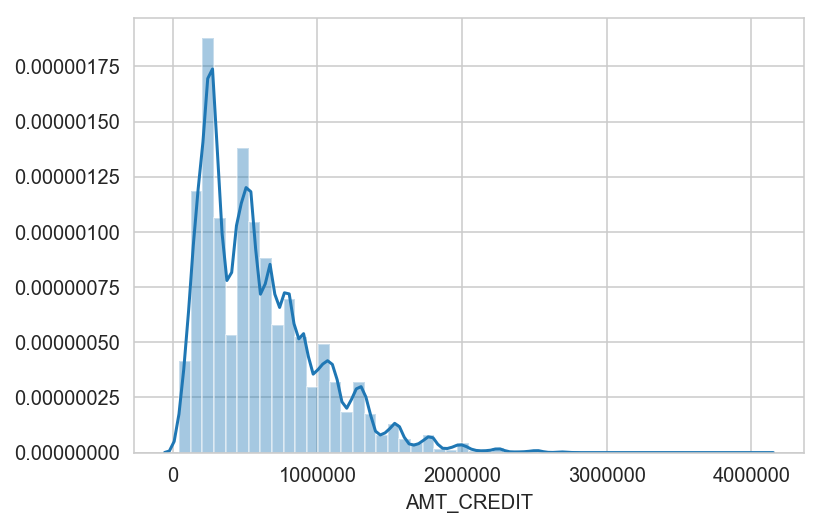

In [45]:
ax = sns.distplot(app_train['AMT_CREDIT']);


#### application.NAME_CONTRACT_TYPE

Analyzing NAME_CONTRACT_TYPE:
--------------------------------------------------
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
  NAME_CONTRACT_TYPE  TARGET   count   percent
0         Cash loans       0  255011  0.916541
1         Cash loans       1   23221  0.083459
2    Revolving loans       0   27675  0.945217
3    Revolving loans       1    1604  0.054783


AttributeError: 'FacetGrid' object has no attribute 'set_title'

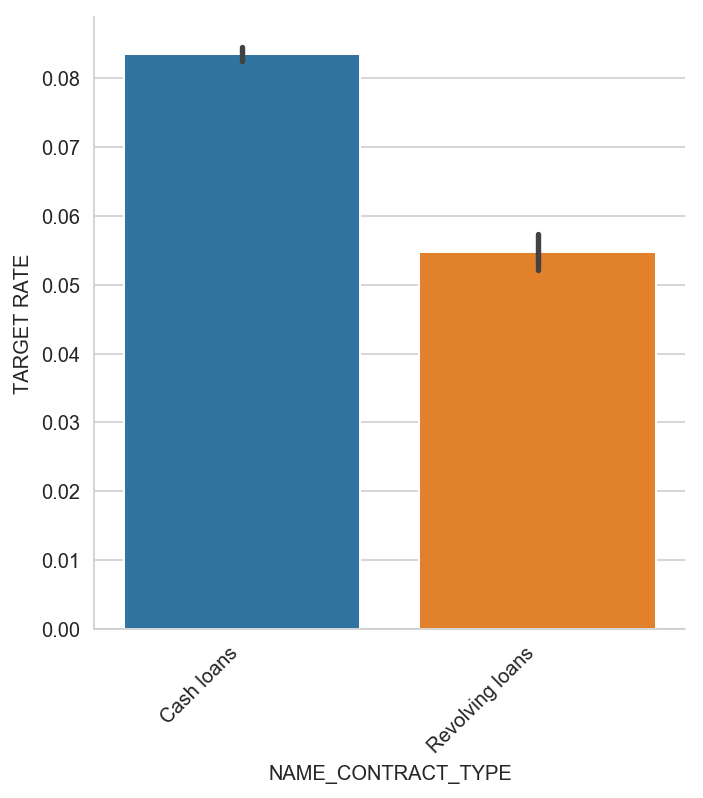

In [46]:
analyse_object_basic(app_train,'NAME_CONTRACT_TYPE','TARGET')

Analyzing ORGANIZATION_TYPE:
--------------------------------------------------
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                

AttributeError: 'FacetGrid' object has no attribute 'set_title'

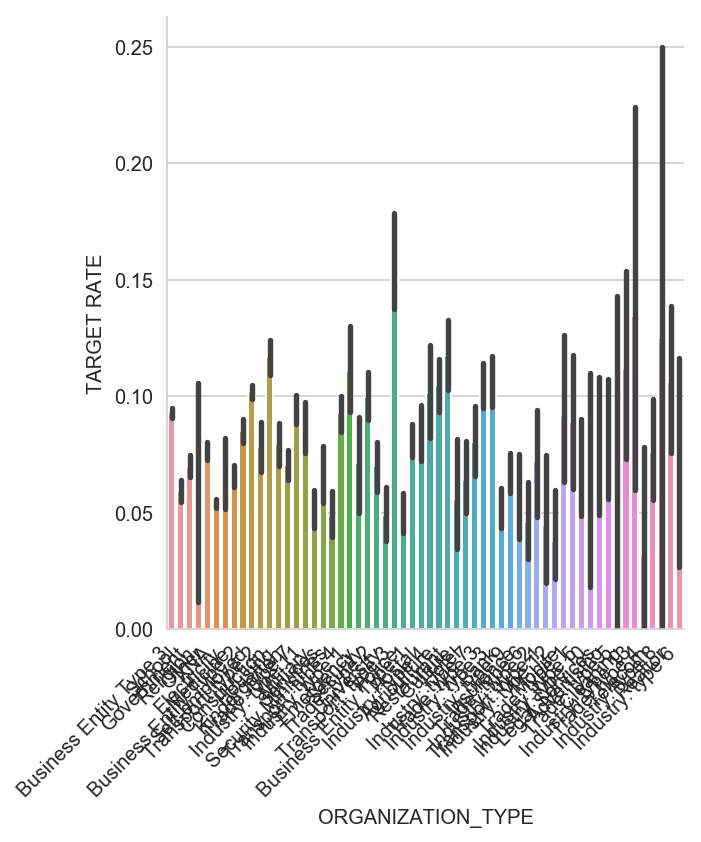

In [62]:
analyse_object_basic(app_train,'ORGANIZATION_TYPE','TARGET')

#### application.CODE_GENDER

In [ ]:
analyse_object_basic(app_train,'CODE_GENDER','TARGET')

#### application.FLAG_OWN_CAR

In [ ]:
analyse_object_basic(app_train,'FLAG_OWN_CAR','TARGET')

#### application.FLAG_OWN_REALTY

In [ ]:
analyse_object_basic(app_train,'FLAG_OWN_REALTY','TARGET')

In [ ]:
#### application.CNT_CHILDREN

In [ ]:
analyse_numerical_basic(app_train,'CNT_CHILDREN','TARGET')

In [ ]:
sns.boxplot(x='CNT_CHILDREN', y='TARGET',data=app_train)

#### application.AMT_INCOME_TOTAL

In [ ]:
analyse_numerical_basic(app_train,'AMT_INCOME_TOTAL','TARGET')

In [ ]:
sns.distplot(np.log(app_train['AMT_INCOME_TOTAL']));
# from the log can see the distribution better

From the above charts, observe some outliers.

In [ ]:
get_outliers(app_train,'AMT_INCOME_TOTAL')['TARGET'].value_counts()
# cannot just throw away the outliers by percentile as a significant number of them have target = 1

In [ ]:
df_outliers_AMT_INCOME_TOTAL = get_outliers(app_train,'AMT_INCOME_TOTAL')[['TARGET','AMT_INCOME_TOTAL']]

In [ ]:
app_train['AMT_INCOME_TOTAL'].describe()

In [ ]:
app_train.boxplot(column='AMT_INCOME_TOTAL')

In [ ]:
plt.hist(app_train['AMT_INCOME_TOTAL'],bins=25)
plt.title('Distribution of Client Income'); plt.xlabel('Client Income'); plt.ylabel('Count');

In [ ]:
app_train['AMT_INCOME_TOTAL'].head(10)

In [ ]:
q=app_train["AMT_INCOME_TOTAL"].quantile(0.99)
q

In [ ]:
m=app_train["AMT_INCOME_TOTAL"].median()
m

In [ ]:
app_train["AMT_INCOME_TOTAL_SMOOTH"] = app_train['AMT_INCOME_TOTAL'].map(lambda x: x if x < q else m)

In [ ]:
plt.hist(app_train['AMT_INCOME_TOTAL_SMOOTH'],bins=25)
plt.title('Distribution of Client Income'); plt.xlabel('Client Income'); plt.ylabel('Count');

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AMT_INCOME_TOTAL_SMOOTH'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AMT_INCOME_TOTAL_SMOOTH'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Income of Client'); plt.ylabel('Density'); plt.title('Distribution of Income');

In [ ]:
# Income information into a separate dataframe
income_data = app_train[['TARGET', 'AMT_INCOME_TOTAL_SMOOTH']]

# Bin the age data
income_data.loc[:,'AMT_INCOME_TOTAL_SMOOTH'] = pd.cut(income_data['AMT_INCOME_TOTAL_SMOOTH'], bins = 50)

# Group by the bin and calculate averages
income_groups  = income_data.groupby('AMT_INCOME_TOTAL_SMOOTH').mean()
income_groups

plt.figure(figsize = (15, 8))

ax = sns.barplot(x=income_groups.index.astype(str), y=income_groups['TARGET'])
ax.set_ylabel('TARGET Rate', fontsize=12)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

#### application.AMT_CREDIT

In [ ]:
analyse_numerical_basic(app_train,'AMT_CREDIT','TARGET')

#### application.OCCUPATION_TYPE

Analyzing OCCUPATION_TYPE:
--------------------------------------------------
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
--------------------------------------------------
          OCCUPATION_TYPE  TARGET  count   percent
0             Accountants       0   9339  0.951697
1             Accountants       1    474  0.048303
2          Cleaning staff       0   4206  0.903933
3          Cleaning staff       1    447  0.096067
4           Cooking st

AttributeError: 'FacetGrid' object has no attribute 'set_title'

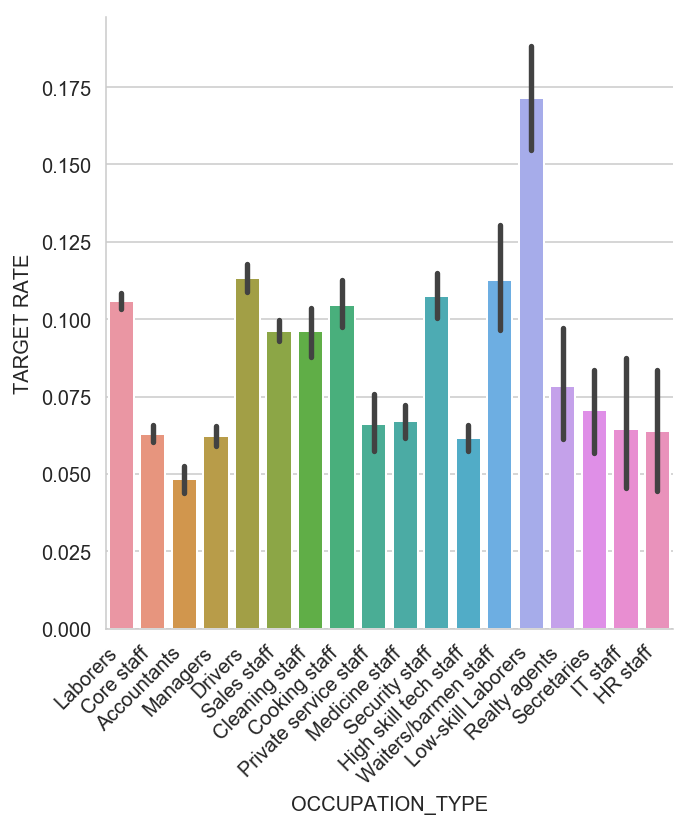

In [9]:
analyse_object_basic(app_train,'OCCUPATION_TYPE','TARGET')

Analyzing ORGANIZATION_TYPE:
--------------------------------------------------
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                

AttributeError: 'FacetGrid' object has no attribute 'set_title'

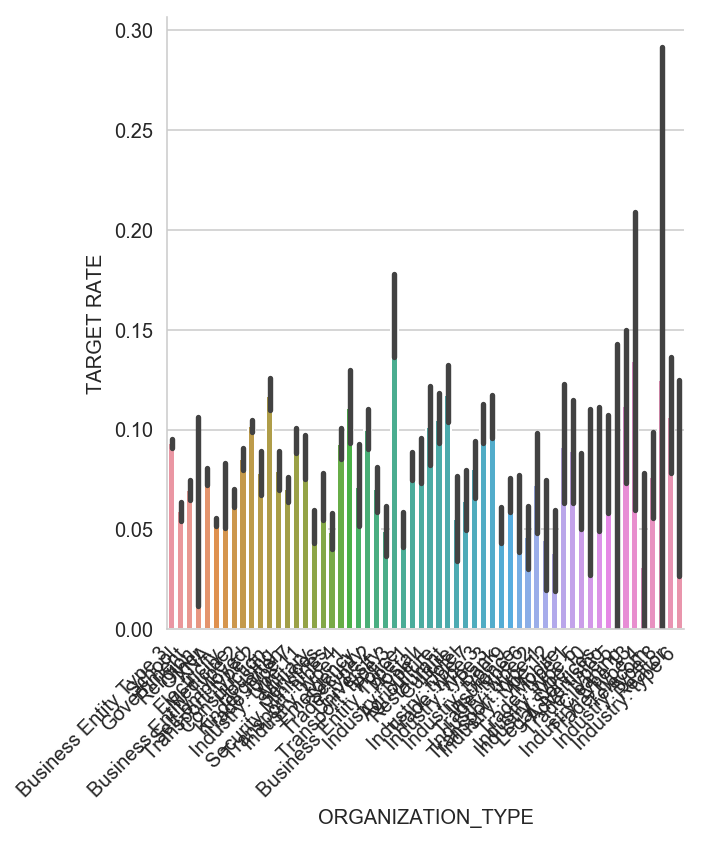

In [10]:
analyse_object_basic(app_train,'ORGANIZATION_TYPE','TARGET')

#### application.EMERGENCYSTATE_MODE

In [ ]:
analyse_object_basic(app_train,'EMERGENCYSTATE_MODE','TARGET')

In [ ]:
analyse_object_basic(app_train,'WALLSMATERIAL_MODE','TARGET')

In [ ]:
365243/365
# Employed for one thousand years? This value is an outlier

In [ ]:
app_train[app_train['DAYS_EMPLOYED']==365243].count()['SK_ID_CURR']

In [ ]:
((app_train[app_train['DAYS_EMPLOYED']==365243].count()['SK_ID_CURR']) / app_train.shape[0]) * 100

In [ ]:
sns.countplot(app_train[app_train['DAYS_EMPLOYED']==365243]['TARGET'])

In [ ]:
sns.violinplot(x='TARGET', y='DAYS_EMPLOYED', data=app_train)    

#### app_train.DAYS_BIRTH

In [ ]:
analyse_numerical_basic(app_train,'DAYS_BIRTH','TARGET')

In [ ]:
sns.boxplot(x='TARGET',y='DAYS_BIRTH',data=app_train)   

In [ ]:
ax = sns.distplot(app_train['DAYS_BIRTH']/-365);
ax.set(xlabel='Years in Age')

In [ ]:
plt.hist(app_train['DAYS_BIRTH'] / -365,bins=25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [ ]:
# this is an anti-thesis

ax = sns.lmplot(x='DAYS_BIRTH',y='TARGET',data=app_train);
ax.set(xlabel='Years in Age')

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# Below split into age groups

In [ ]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = abs(age_data['DAYS_BIRTH'] / 365)

# Bin the age data
age_data.loc[:,'YEARS_BIRTH'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BIRTH').mean()
age_groups

plt.figure(figsize = (8, 8))

ax = sns.barplot(x=age_groups.index.astype(str), y=age_groups['TARGET'])
ax.set_ylabel('Loan Default Rate', fontsize=22)
ax.set_xlabel('Age', fontsize=22)
ax.set_title("Loan Default Rate Across Age", fontsize=25)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=16)
sns.set(font_scale = 1)

#### application.EXT_SOURCE_1

In [ ]:
analyse_numerical_basic(app_train[app_train['EXT_SOURCE_1'].isnull()==False][['EXT_SOURCE_1','TARGET']],'EXT_SOURCE_1','TARGET')

In [ ]:
# Income information into a separate dataframe
temp_data = app_train[['TARGET', 'EXT_SOURCE_1']]

# Bin the age data
temp_data.loc[:,'EXT_SOURCE_1'] = pd.cut(temp_data['EXT_SOURCE_1'], bins = 30)

# Group by the bin and calculate averages
temp_groups  = temp_data.groupby('EXT_SOURCE_1').mean()

plt.figure(figsize = (15, 8))

ax = sns.barplot(x=temp_groups.index.astype(str), y=temp_groups['TARGET'])
ax.set_ylabel('TARGET Rate', fontsize=12)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

### application.EXT_SOURCE_2

In [ ]:
analyse_numerical_basic(app_train[app_train['EXT_SOURCE_2'].isnull()==False][['EXT_SOURCE_2','TARGET']],'EXT_SOURCE_2','TARGET')

In [ ]:
# Income information into a separate dataframe
temp_data = app_train[['TARGET', 'EXT_SOURCE_2']]

# Bin the age data
temp_data.loc[:,'EXT_SOURCE_2'] = pd.cut(temp_data['EXT_SOURCE_2'], bins = 30)

# Group by the bin and calculate averages
temp_groups  = temp_data.groupby('EXT_SOURCE_2').mean()

plt.figure(figsize = (15, 8))

ax = sns.barplot(x=temp_groups.index.astype(str), y=temp_groups['TARGET'])
ax.set_ylabel('TARGET Rate', fontsize=12)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

### application.EXT_SOURCE_3

In [ ]:
analyse_numerical_basic(app_train[app_train['EXT_SOURCE_3'].isnull()==False][['EXT_SOURCE_3','TARGET']],'EXT_SOURCE_3','TARGET')

In [ ]:
# Income information into a separate dataframe
temp_data = app_train[['TARGET', 'EXT_SOURCE_3']]

# Bin the age data
temp_data.loc[:,'EXT_SOURCE_3'] = pd.cut(temp_data['EXT_SOURCE_3'], bins = 30)

# Group by the bin and calculate averages
temp_groups  = temp_data.groupby('EXT_SOURCE_3').mean()

plt.figure(figsize = (15, 8))

ax = sns.barplot(x=temp_groups.index.astype(str), y=temp_groups['TARGET'])
ax.set_ylabel('TARGET Rate', fontsize=12)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

### Bivariate analysis

#### app_train['CREDIT_ANNUITY_RATIO'] = round(app_train['AMT_CREDIT'] / app_train['AMT_ANNUITY'])

In [47]:
app_train.head()[['AMT_ANNUITY','AMT_CREDIT']]

,AMT_ANNUITY,AMT_CREDIT
0,24700.5,406597.5
1,35698.5,1293502.5
2,6750.0,135000.0
3,29686.5,312682.5
4,21865.5,513000.0


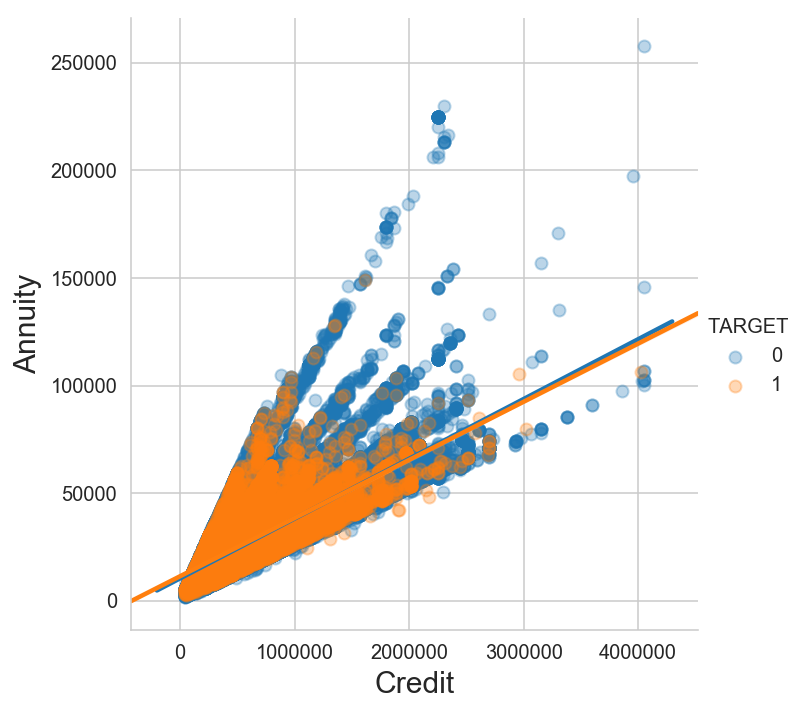

In [63]:
ax = sns.lmplot(x="AMT_CREDIT", y="AMT_ANNUITY", data=app_train, hue='TARGET',scatter_kws={'alpha':0.3})
ax.set_titles('Credit vs Annuity', fontsize=15)
ax.set_ylabels('Annuity', fontsize=15)
ax.set_xlabels('Credit', fontsize=15)

In [49]:
app_train['CREDIT_ANNUITY_RATIO'] = round(app_train['AMT_CREDIT'] / app_train['AMT_ANNUITY'])

In [ ]:
app_train['CREDIT_ANNUITY_RATIO'].head()

In [ ]:
analyse_numerical_basic(app_train[app_train['CREDIT_ANNUITY_RATIO'].isnull()==False][['CREDIT_ANNUITY_RATIO','TARGET']],'CREDIT_ANNUITY_RATIO','TARGET')

In [ ]:
app_train['AMT_ANNUITY'].isnull().sum()

<Figure size 432x288 with 0 Axes>

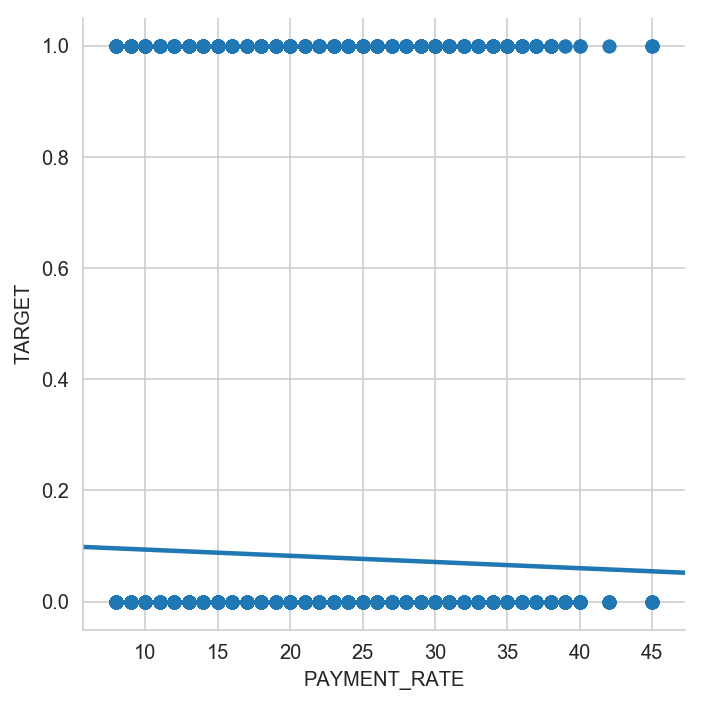

In [50]:
# scatterplot against target
plt.figure()
g = sns.lmplot(x='CREDIT_ANNUITY_RATIO', y='TARGET', data=app_train)   
g.set_titles('Scatter plot of ' + 'CREDIT_ANNUITY_RATIO' + ' against target', fontsize=15)

Text(0.5,1,'Distribution (Violin Plot) of PAYMENT_RATE by target')

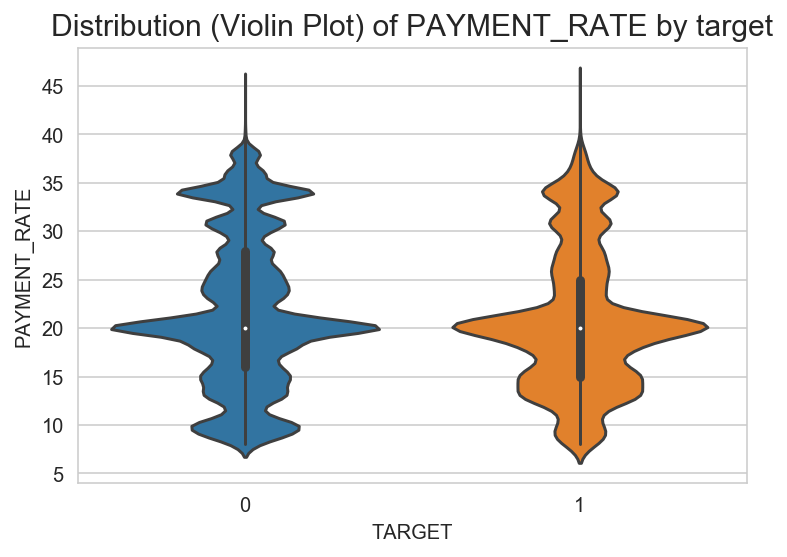

In [52]:
# view of distribution based on TARGET
plt.figure()    
ax = sns.violinplot(x='TARGET', y='CREDIT_ANNUITY_RATIO', data=app_train)
ax.set_title('Distribution (Violin Plot) of ' + 'CREDIT_ANNUITY_RATIO' + ' by target', fontsize=15)

C:\Users\mail\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


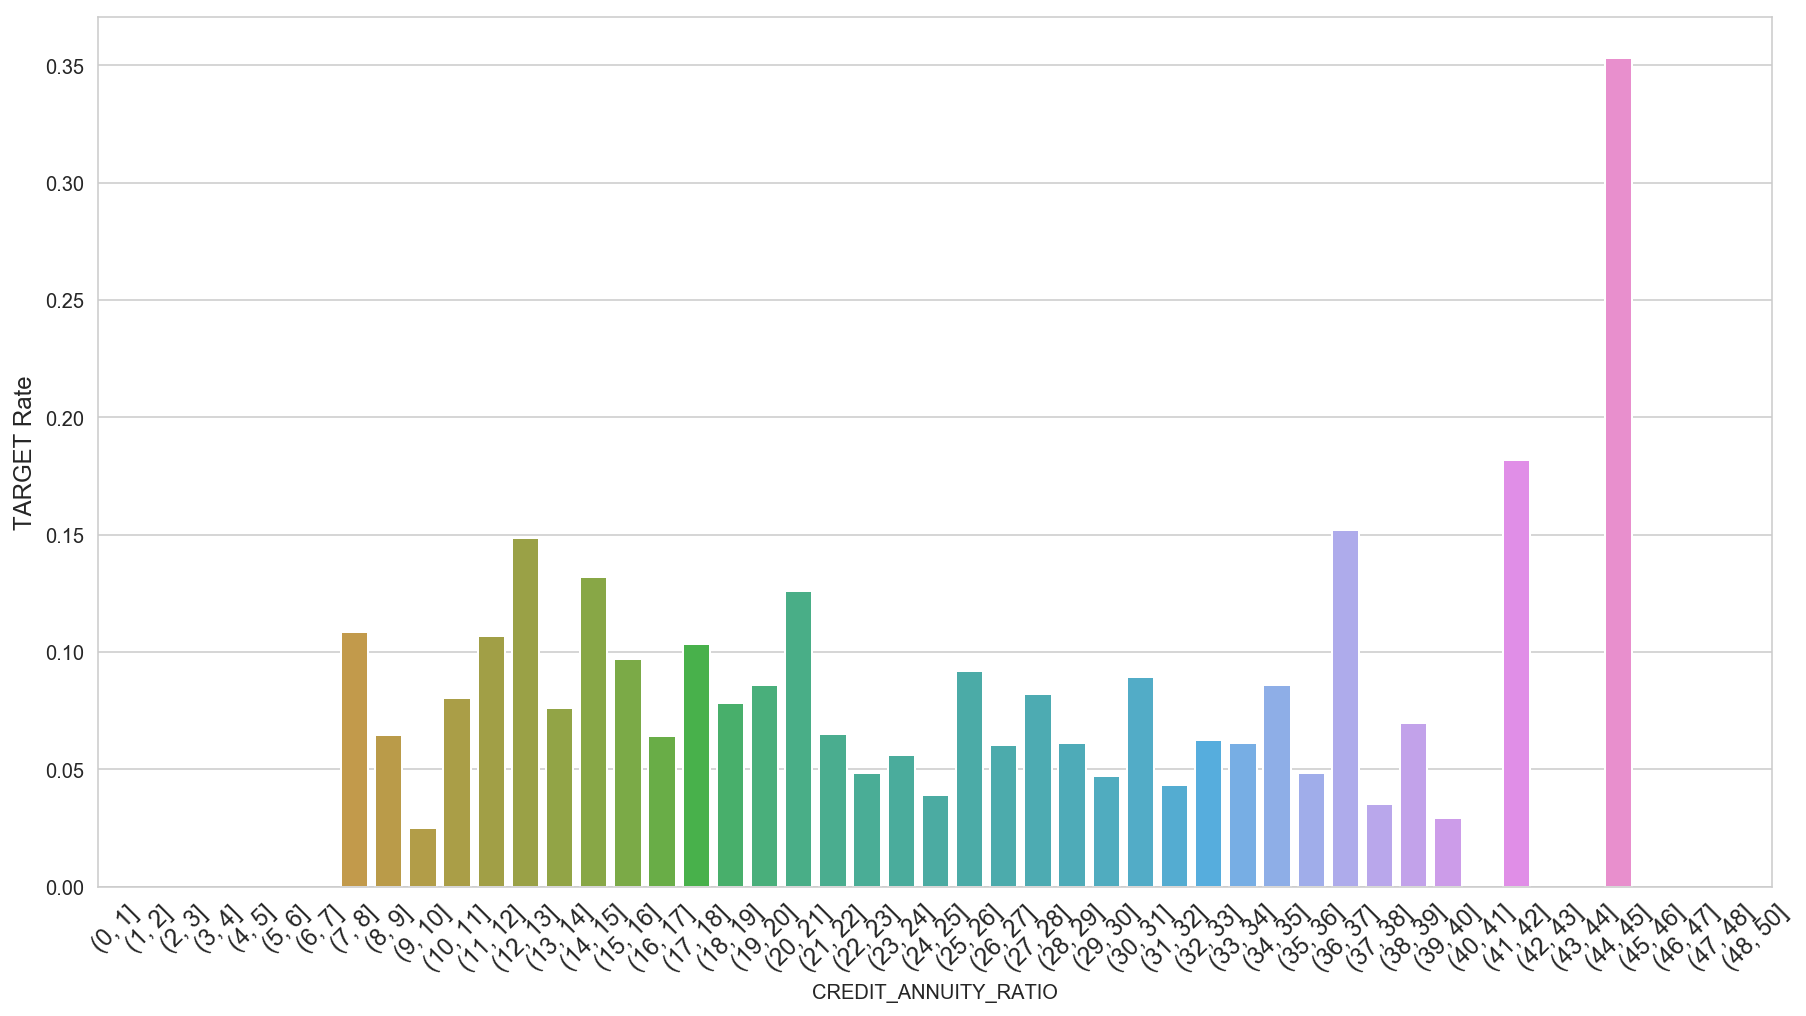

In [55]:
# Income information into a separate dataframe
temp_data = app_train[['TARGET', 'CREDIT_ANNUITY_RATIO']]

# Bin the age data
temp_data.loc[:,'CREDIT_ANNUITY_RATIO'] = pd.cut(temp_data['CREDIT_ANNUITY_RATIO'], np.linspace(0, 50, dtype=int))

# Group by the bin and calculate averages
temp_groups  = temp_data.groupby('CREDIT_ANNUITY_RATIO').mean()

plt.figure(figsize = (15, 8))

ax = sns.barplot(x=temp_groups.index.astype(str), y=temp_groups['TARGET'])
ax.set_ylabel('TARGET Rate', fontsize=12)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

Text(0.5,1,'Distribution (Strip Plot) of PAYMENT_RATE by target')

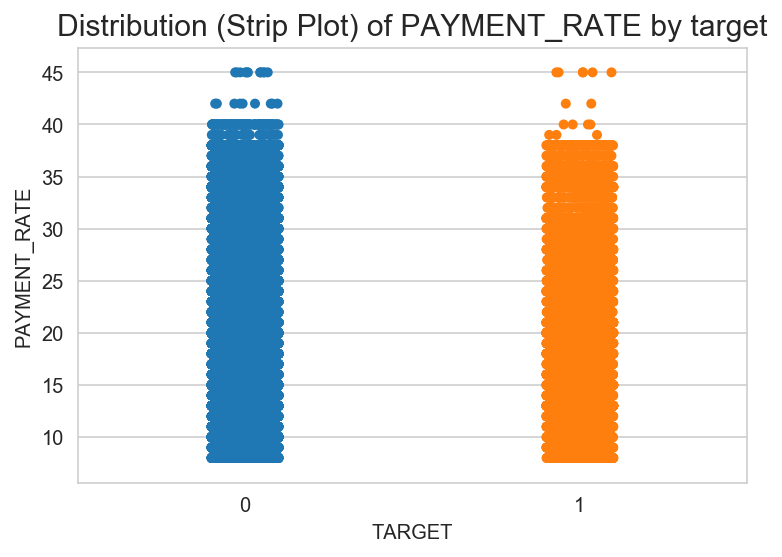

In [53]:
# strip plot
plt.figure()    
ax = sns.stripplot(x='TARGET', y='PAYMENT_RATE', data=app_train)    
ax.set_title('Distribution (Strip Plot) of ' + 'PAYMENT_RATE' + ' by target', fontsize=15)

In [ ]:
# check outliers

In [ ]:
# check collinearity with target

In [ ]:
# check multi-collinearity

<a id='feature_engineering'></a>
### Feature Engineering

<a id='functions_data_cleaning'></a>
### Functions for Data Cleaning

In [63]:
# replace outrageous outliers with imputed values
def im_replace_outliers_in_DAYS_EMPLOYED(df, value):
    df['DAYS_EMPLOYED'].replace(365243, value, inplace= True)
    return df


<a id='feature_engineering'></a>
### Feature Engineering

In [29]:
# Some simple new features (percentages)
def fe_add_domain_features(df_train):
    df_train['DAYS_EMPLOYED_PERCENT'] = df_train['DAYS_EMPLOYED'] / df_train['DAYS_BIRTH']
    df_train['INCOME_CREDIT_PERCENT'] = df_train['AMT_INCOME_TOTAL'] / df_train['AMT_CREDIT']
    df_train['INCOME_PER_PERSON'] = df_train['AMT_INCOME_TOTAL'] / df_train['CNT_FAM_MEMBERS']
    df_train['ANNUITY_INCOME_PERCENT'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']
    df_train['PAYMENT_RATE'] = df_train['AMT_ANNUITY'] / df_train['AMT_CREDIT']
    
    return df_train

<a href="https://icons8.com">Icon pack by Icons8</a>